# 🧠 Apprentissage d'un CNN sur CIFAR-10 (explication complète)

Ce notebook explique comment entraîner un modèle CNN sur le dataset **CIFAR-10** en détaillant toutes les étapes : chargement, prétraitement, création du modèle, visualisation des métriques, et tests sur des images.

In [5]:
# 📥 Chargement des données CIFAR-10
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.datasets import cifar10


print(f"Version de TensorFlow : {tf.__version__}")
print(f"GPU disponible : {tf.config.list_physical_devices('GPU')}")

# Configuration pour la reproductibilité
tf.random.set_seed(42)
np.random.seed(42)

Version de TensorFlow : 2.19.0
GPU disponible : []


In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step
x_train shape: (50000, 32, 32, 3), y_train shape: (50000, 1)


## 🔍 Visualisation de quelques images du dataset CIFAR-10

In [7]:
# Noms des classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Exemples d'images du dataset :


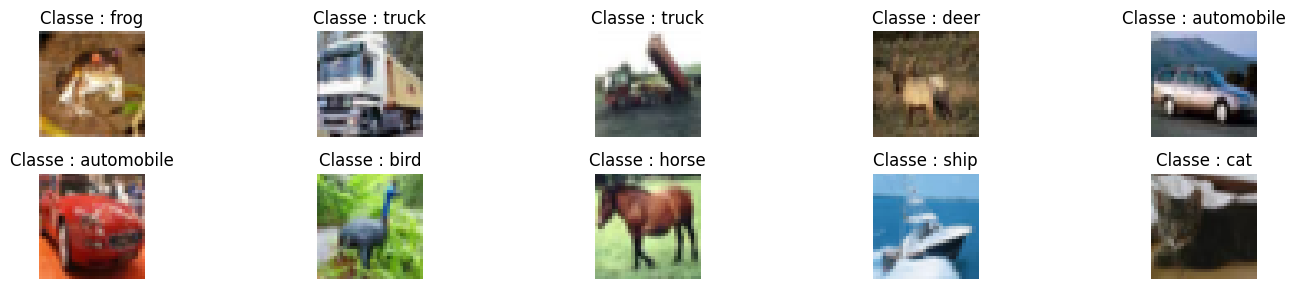

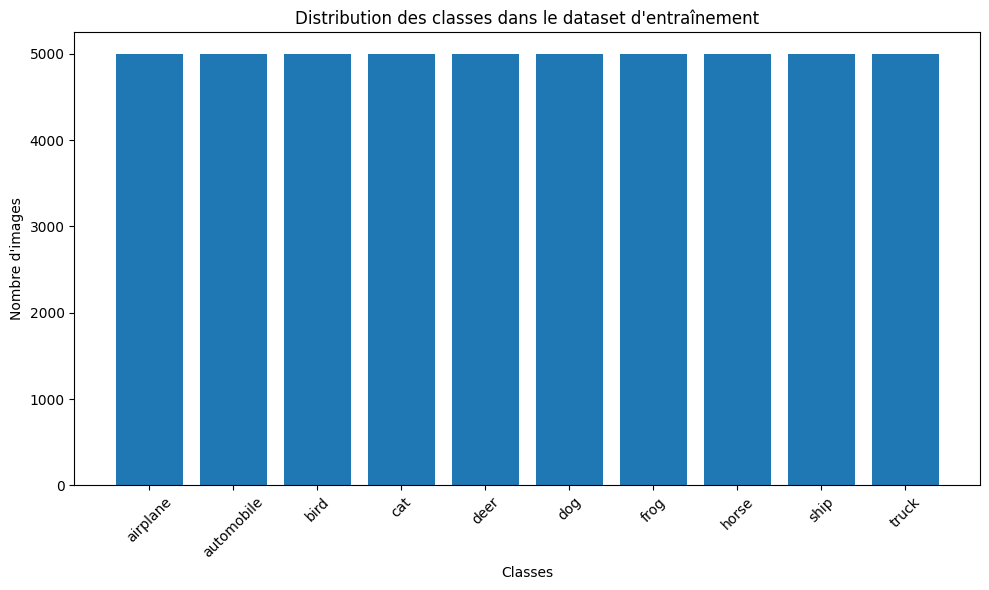

In [8]:
# Fonction pour afficher des exemples d'images
def afficher_exemples(x, y, class_names, n_exemples=10):
    """
    Affiche des exemples d'images du dataset
    """
    plt.figure(figsize=(15, 3))
    for i in range(n_exemples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.title(f'Classe : {class_names[y[i][0]]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Affichage d'exemples
print("Exemples d'images du dataset :")
afficher_exemples(x_train, y_train, class_names)

# Distribution des classes
plt.figure(figsize=(10, 6))
unique, counts = np.unique(y_train, return_counts=True)
plt.bar([class_names[i] for i in unique], counts)
plt.title('Distribution des classes dans le dataset d\'entraînement')
plt.xlabel('Classes')
plt.ylabel('Nombre d\'images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🧼 Prétraitement des données
- On **divise par 255** pour normaliser les pixels entre 0 et 1.
- On encode les étiquettes en one-hot.

In [9]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

## 🧱 Création du modèle CNN expliqué

- **Conv2D(32, (3,3))** : 32 filtres de taille 3x3
- **MaxPooling2D(2,2)** : Réduction de dimension
- **Flatten** : passage en vecteur plat
- **Dense(128)** : couche dense avec 128 neurones
- **Dropout(0.5)** : désactivation de neurones aléatoires (régularisation)
- **Dense(10, softmax)** : 10 classes de sortie
### 🔍 Pourquoi 32 filtres ?
- Chaque **filtre** détecte un motif spécifique dans l'image (bord, texture, couleur, forme...)
- **32 filtres** signifie que la couche peut détecter **32 types de motifs différents**
- C’est un bon compromis : assez riche sans trop alourdir le modèle
- Plus il y a de filtres → plus le modèle peut apprendre de choses, mais ça demande plus de calcul

### 🎯 Pourquoi utiliser `softmax` ?
- `softmax` transforme les scores en **probabilités** (somme = 1)
- Cela permet d'interpréter la sortie comme : "quelle est la probabilité que ce soit un chat, un chien, etc."
- On peut ensuite choisir la **classe avec la plus grande probabilité** comme résultat final
- Obligatoire pour faire de la **classification multiclasse** (10 classes ici pour CIFAR-10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

/home/apprenant/Documents/Computer Vision/cnn-cifar10-training/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

## 🚀 Entraînement du modèle

In [11]:
# 🧩 Callback pour améliorer l'entraînement : ReduceLROnPlateau
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Surveille la perte de validation
    factor=0.5,          # Réduit le LR par un facteur de 0.5
    patience=3,          # Attends 3 epochs sans amélioration
    min_lr=1e-6,         # Ne descend pas en dessous de 1e-6
    verbose=1            # Affiche un message
)

In [21]:
# ➕ Callbacks supplémentaires : EarlyStopping et ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', verbose=1)

# Ajout de tous les callbacks
callbacks = [reduce_lr, early_stop, checkpoint]

In [22]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# OK : callbacks ici
history = model.fit(
    x_train,
    y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks  # ✅ ici et seulement ici !
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6846 - loss: 0.8875
Epoch 1: val_loss improved from inf to 0.87949, saving model to best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.6846 - loss: 0.8875 - val_accuracy: 0.6967 - val_loss: 0.8795 - learning_rate: 0.0010
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6945 - loss: 0.8548
Epoch 2: val_loss did not improve from 0.87949
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6945 - loss: 0.8548 - val_accuracy: 0.6954 - val_loss: 0.8960 - learning_rate: 0.0010
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7032 - loss: 0.8354
Epoch 3: val_loss did not improve from 0.87949
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.7032 - loss: 0.8353 - val_accuracy: 0.6990 - val_loss: 0.8847 - learning_rate: 0.0010
Epoch 4/10
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7124 - loss: 0.8148
Epoch 4: ReduceLROnPlateau reducing learning rat

In [14]:
import datetime

# Générer un nom de fichier unique avec la date et l'heure actuelles
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f"cifar10_model_{timestamp}.keras"

# Sauvegarder le modèle
model.save(model_filename)
print(f"Modèle sauvegardé sous le nom : {model_filename}")


Modèle sauvegardé sous le nom : cifar10_model_20250602_112128.keras


In [15]:
from tensorflow.keras.models import load_model


# model_filename = "cifar10_model_20250601_194349.keras"
model_filename = model_filename
# Charger le modèle sauvegardé
loaded_model = load_model(model_filename)
print("Modèle chargé avec succès.")


Modèle chargé avec succès.


/home/apprenant/Documents/Computer Vision/cnn-cifar10-training/.venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## 📈 Visualisation des courbes d'entraînement

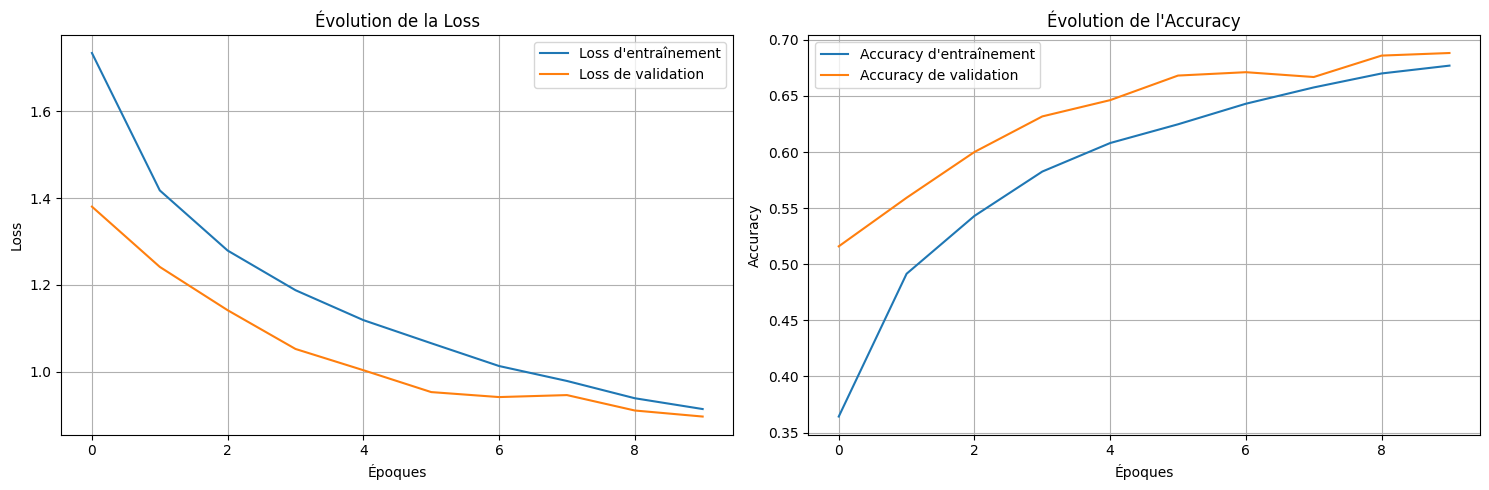

In [16]:
def afficher_courbes_apprentissage(history):
    """
    Affiche les courbes de loss et d'accuracy
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Courbe de loss
    axes[0].plot(history.history['loss'], label='Loss d\'entraînement')
    axes[0].plot(history.history['val_loss'], label='Loss de validation')
    axes[0].set_title('Évolution de la Loss')
    axes[0].set_xlabel('Époques')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(True)

    # Courbe d'accuracy
    axes[1].plot(history.history['accuracy'], label='Accuracy d\'entraînement')
    axes[1].plot(history.history['val_accuracy'], label='Accuracy de validation')
    axes[1].set_title('Évolution de l\'Accuracy')
    axes[1].set_xlabel('Époques')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

afficher_courbes_apprentissage(history)

## 🧪 Évaluation du modèle

In [17]:
# Évaluation finale
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Accuracy sur le jeu de test : {test_accuracy:.4f}")
print(f"Loss sur le jeu de test : {test_loss:.4f}")

# Prédictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

2025-06-02 11:21:28.989048: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


Accuracy sur le jeu de test : 0.6864
Loss sur le jeu de test : 0.9024
 34/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

2025-06-02 11:21:30.213041: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Rapport de classification :
              precision    recall  f1-score   support

    airplane       0.69      0.77      0.73      1000
  automobile       0.83      0.80      0.82      1000
        bird       0.59      0.52      0.55      1000
         cat       0.56      0.41      0.48      1000
        deer       0.59      0.68      0.63      1000
         dog       0.64      0.51      0.57      1000
        frog       0.69      0.81      0.75      1000
       horse       0.67      0.79      0.72      1000
        ship       0.81      0.79      0.80      1000
       truck       0.77      0.77      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.68      0.69      0.68     10000
weighted avg       0.68      0.69      0.68     10000



In [18]:
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"Perte sur test : {loss:.4f}")
print(f"Précision sur test : {accuracy:.4f}")

 45/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6847 - loss: 0.9154

2025-06-02 11:21:31.474761: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6854 - loss: 0.8997
Perte sur test : 0.9024
Précision sur test : 0.6864


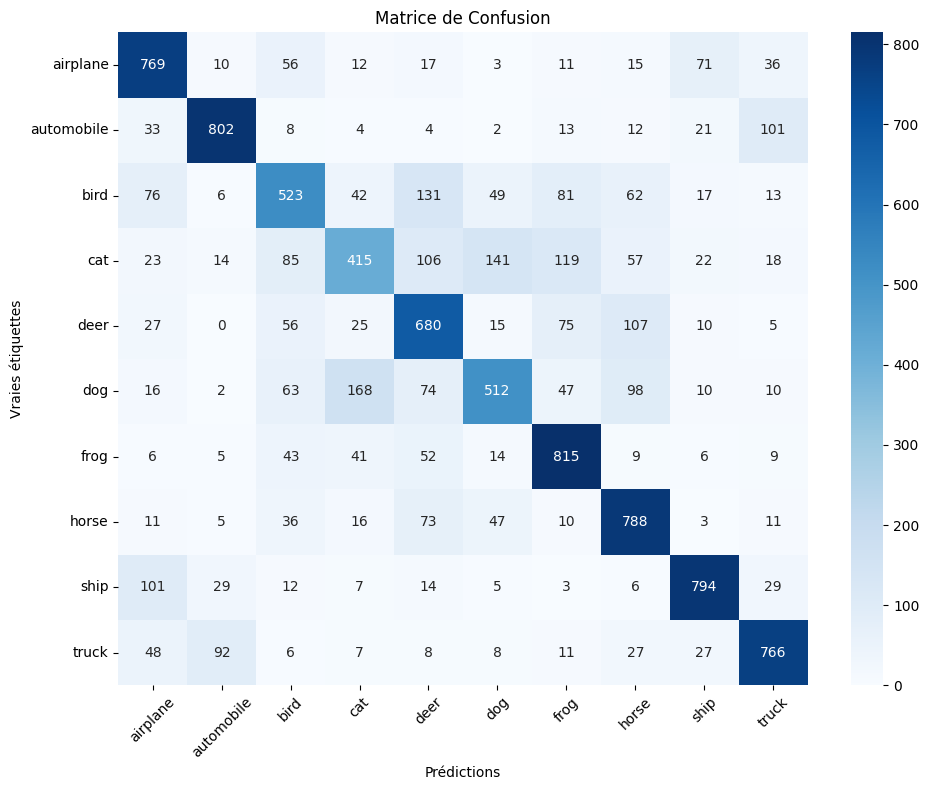

In [19]:
# Matrice de confusion
def afficher_matrice_confusion(y_true, y_pred, class_names):
    """
    Affiche la matrice de confusion
    """
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Matrice de Confusion')
    plt.xlabel('Prédictions')
    plt.ylabel('Vraies étiquettes')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

afficher_matrice_confusion(y_true, y_pred_classes, class_names)

## 🖼️ Test du modèle sur 3 images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/tmp/ipykernel_14496/1594060582.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Vrai: {class_names[int(real_labels[i])]} - Prédit: {class_names[int(pred_classes[i])]}")


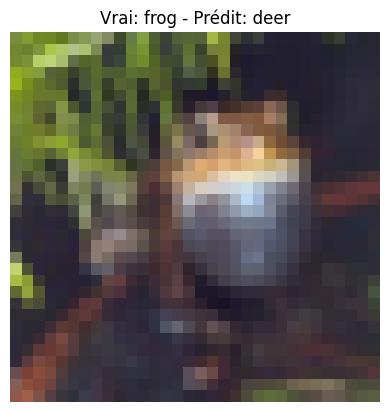

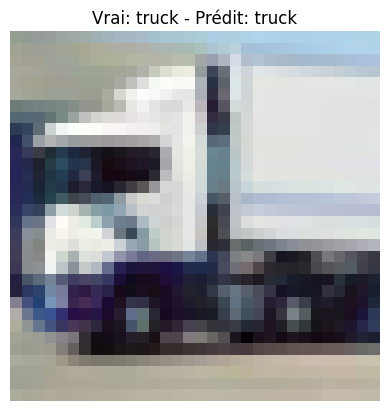

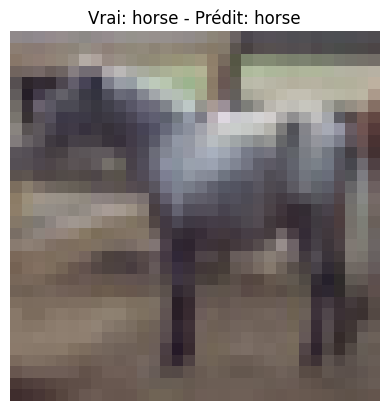

In [27]:
indices = np.random.choice(len(x_test), 3, replace=False)
samples = x_test[indices]
real_labels = y_test[indices]
preds = model.predict(samples)
pred_classes = np.argmax(preds, axis=1)

for i in range(3):
    plt.imshow(samples[i])
    plt.title(f"Vrai: {class_names[int(real_labels[i])]} - Prédit: {class_names[int(pred_classes[i])]}")
    plt.axis('off')
    plt.show()